In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv("train.csv")
# filling numerical missing data
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

# filling categorical missing data
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

# apply log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])

df['LoanAmountLog'] = np.log(df['LoanAmount'])

df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])

df['Total_Income_Log'] = np.log(df['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)




In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.info()

In [27]:
df.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842199,8.341213,4.862066,5.802065,8.669414
std,0.349681,0.645263,0.496575,0.312482,0.545102
min,0.000000,5.010635,2.197225,2.484907,7.273786
25%,1.000000,7.964677,4.607658,5.886104,8.334712
50%,1.000000,8.246040,4.859812,5.886104,8.597205
75%,1.000000,8.664750,5.104426,5.886104,8.925549
max,1.000000,11.302204,6.551080,6.173786,11.302204


In [28]:
ef = pd.read_csv("test.csv")
# filling numerical missing data
ef['LoanAmount']=ef['LoanAmount'].fillna(ef['LoanAmount'].mean())
ef['Loan_Amount_Term']=ef['Loan_Amount_Term'].fillna(ef['Loan_Amount_Term'].mean())
ef['Credit_History']=ef['Credit_History'].fillna(ef['Credit_History'].mean())

# filling categorical missing data
ef['Gender']=ef['Gender'].fillna(ef['Gender'].mode()[0])
ef['Married']=ef['Married'].fillna(ef['Married'].mode()[0])
ef['Dependents']=ef['Dependents'].fillna(ef['Dependents'].mode()[0])
ef['Self_Employed']=ef['Self_Employed'].fillna(ef['Self_Employed'].mode()[0])

ef['Total_income'] = ef['ApplicantIncome']+ef['CoapplicantIncome']

# apply log transformation to the attribute
ef['ApplicantIncomeLog'] = np.log(ef['ApplicantIncome'])

ef['CoapplicantIncomeLog'] = np.log(ef['CoapplicantIncome'])

ef['LoanAmountLog'] = np.log(ef['LoanAmount'])

ef['Loan_Amount_Term_Log'] = np.log(ef['Loan_Amount_Term'])

ef['Total_Income_Log'] = np.log(ef['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
ef = ef.drop(columns=cols, axis=1)




C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
ef.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,0,Graduate,No,1.000000,Urban,8.651724,4.700480,5.886104,8.651724
1,Male,Yes,1,Graduate,No,1.000000,Urban,8.031385,4.836282,5.886104,8.428581
2,Male,Yes,2,Graduate,No,1.000000,Urban,8.517193,5.337538,5.886104,8.824678
3,Male,Yes,2,Graduate,No,0.825444,Urban,7.757906,4.605170,5.886104,8.494129
4,Male,No,0,Not Graduate,No,1.000000,Urban,8.094378,4.356709,5.886104,8.094378


In [29]:
# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [31]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
92,Male,Yes,2,Not Graduate,No,1.0,Urban,8.093462,4.394449,5.886104,8.535622
304,Male,No,0,Graduate,No,1.0,Rural,8.294050,4.941642,5.886104,8.779557
68,Male,Yes,3+,Not Graduate,Yes,1.0,Urban,8.867850,4.828314,4.094345,8.867850
15,Male,No,0,Graduate,No,1.0,Urban,8.507143,4.828314,5.886104,8.507143
211,Male,Yes,3+,Graduate,No,0.0,Semiurban,8.140316,4.852030,5.886104,8.451053


In [53]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
print("Accuracy is", model.score(x_test, y_test)*100)

NameError: name 'model' is not defined

In [55]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 71.42857142857143


In [56]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 77.27272727272727


In [ ]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [58]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)

<Axes: >

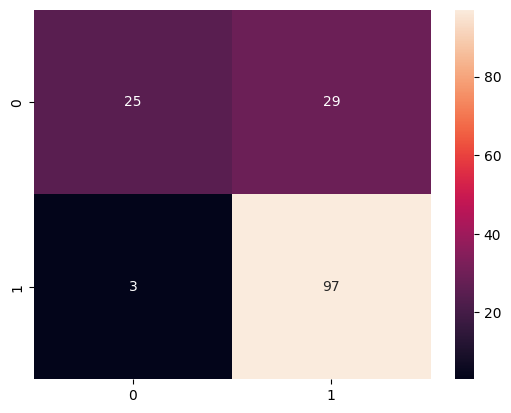

In [59]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le=LabelEncoder() 

for col in cols:
    df[col] =le.fit_transform(df[col])

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [34]:
y_train.head()

92     Y
304    Y
68     Y
15     Y
211    N
Name: Loan_Status, dtype: object

In [36]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
92,Male,Yes,2,Not Graduate,No,1.0,Urban,8.093462,4.394449,5.886104,8.535622
304,Male,No,0,Graduate,No,1.0,Rural,8.294050,4.941642,5.886104,8.779557
68,Male,Yes,3+,Not Graduate,Yes,1.0,Urban,8.867850,4.828314,4.094345,8.867850
15,Male,No,0,Graduate,No,1.0,Urban,8.507143,4.828314,5.886104,8.507143
211,Male,Yes,3+,Graduate,No,0.0,Semiurban,8.140316,4.852030,5.886104,8.451053
